In [1]:
from GyroSolver import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1
f_exc = 0.1
p = 0.1

params = [g, m, h, J1, J3, x0, p, f_exc]
CI = [np.pi-0.0001, 0, 0, 0, 0, 2 * np.pi * 200]

In [23]:
tab_t_burst = np.linspace(0, 20, 31, endpoint=True)
exc_freq = np.linspace(0.75, 1.35, 31, endpoint=True)

tab_t_burst_mesh, exc_freq_mesh = np.meshgrid(tab_t_burst, exc_freq, sparse=True)


chevron = Rabi_Chevron_Maker(1, 1, params, CI, solving_method='RK23', forcing='X')

In [24]:
def aux(x, y):
    return Rabi_Chevron_Maker(x, y, params, CI, solving_method='RK23', forcing='X')

In [25]:
aux2 = np.vectorize(aux)

In [26]:
test = aux2(tab_t_burst_mesh, exc_freq_mesh)

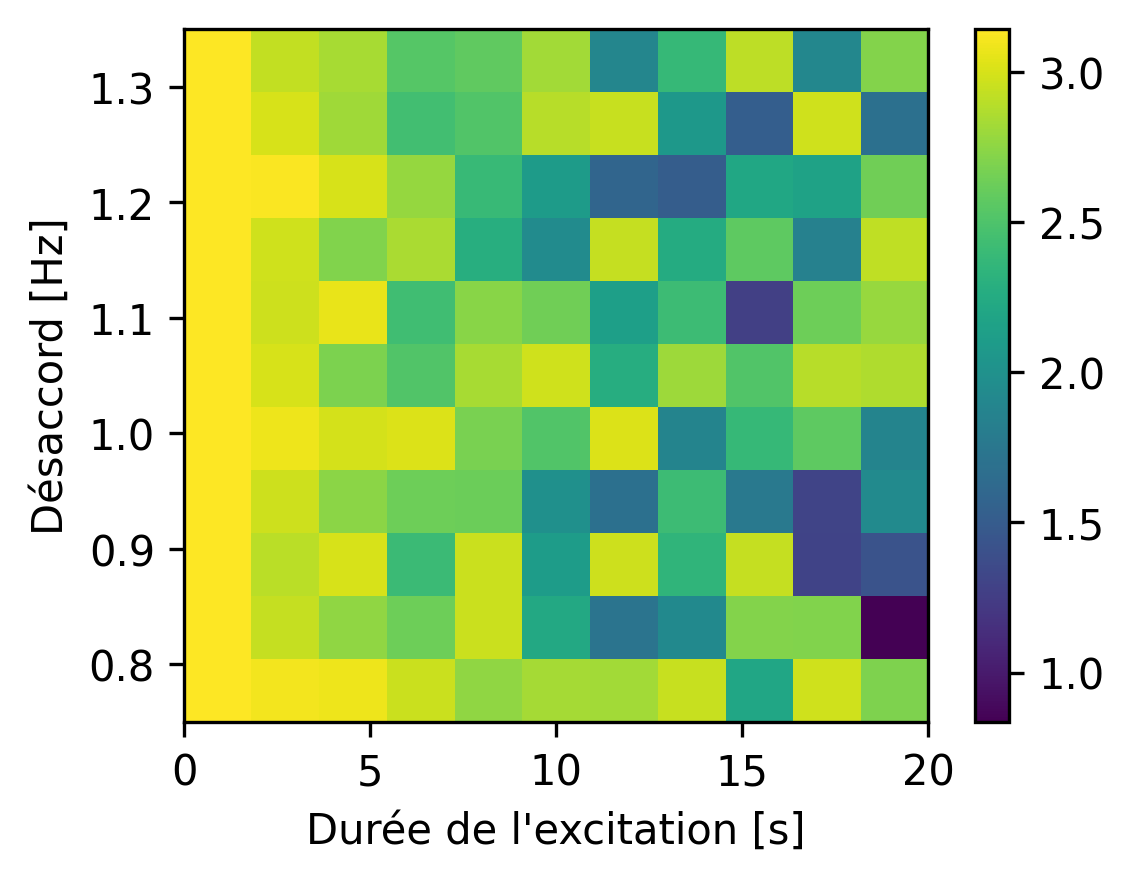

In [22]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(test, origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.xlabel("Durée de l'excitation [s]")
plt.ylabel("Désaccord [Hz]")
plt.colorbar()
plt.savefig("Rabi_test.png")
plt.show()